In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
#importing the csv 
data_frame = pd.read_csv('Somerville_High_School_YRBS_Raw_Data_2002-2016.csv')

Lets rename the unknown/non-entries as "Not mentioned"

In [6]:
#Replacing the Nan values with meaningfull string
data_frame["parents"]= data_frame["parents"].replace([' '], "Not mentioned")

In [7]:
# Get all the unique values in the parents column
data_frame["parents"].unique()

array(['My mother and my father', 'My mother and a step-parent',
       'My mother only', 'My father only',
       'Someone else not on this list', 'My father and a step-parent',
       'Another relative (like a grandparent, aunt/uncle)',
       'Not mentioned', 'Foster parent(s)'], dtype=object)

We are concentrating on single parents i.e., Mother only and Father only. Lets take count 

In [8]:
# Frequency of Values in the column
data_frame["parents"].value_counts()

Not mentioned                                        3917
My mother and my father                              2873
My mother only                                       1130
My mother and a step-parent                           389
Another relative (like a grandparent, aunt/uncle)     226
My father only                                        152
Someone else not on this list                          92
My father and a step-parent                            76
Foster parent(s)                                       16
Name: parents, dtype: int64

As we can see only mother's and father's but there's some overlaps in-between. So we have to break down and get counts of both. As foster parent(s) doesn't have info properly so neglecting that part. 

In [9]:
# Counting all the entries containing "mother" and "father"
# We can do this method or just add up the counts and get the indivisual values wherever 
#mother/father shows up in the above table.
mother = 0
father = 0
for index,value in data_frame["parents"].items():
    if value.find("mother") != -1:
        mother +=1
    if value.find("father") != -1:
        father +=1
print("Frequency of Mother:" +str(mother)+ "\n"+"Ffrequency of father:"+str(father))

Frequency of Mother:4392
Ffrequency of father:3101


In [10]:
# Creating a seperate dataframe for plotting purposesor
parents_data_frame=data_frame.filter(["parents",'id'])
parents_data_frame=parents_data_frame.groupby("parents").count().reset_index()
parents_data_frame.columns=["parents","counts"]
parents_data_frame

,parents,counts
0,"Another relative (like a grandparent, aunt/uncle)",226
1,Foster parent(s),16
2,My father and a step-parent,76
3,My father only,152
4,My mother and a step-parent,389
5,My mother and my father,2873
6,My mother only,1130
7,Not mentioned,2451
8,Someone else not on this list,92


In [11]:
# creating a seperate dataframe to plot
data = [["Mother" , 4392] ,["Father",3101]]
columns = ["parents","counts"]
new_data_frame =pd.DataFrame(data=data,columns=columns)

In [12]:
new_data_frame["counts"]/8872

0    0.495041
1    0.349527
Name: counts, dtype: float64

Almost 50% of the Mothers are contribting/participating in the lives of the children according to the data and likewise 34% of fathers too.Honestly these are pretty inacurate as "Not mentioned" values or"Nan" is around 27.6% of original data's gone missing.The foster-parents are around 16 so we may have 0.00180% error if we exclude in our calculations so that's negligible.

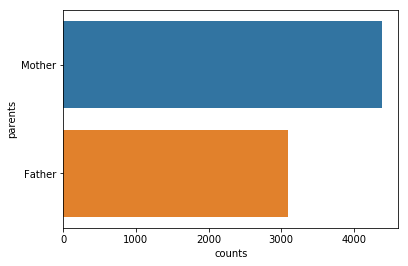

In [13]:
plot = sns.barplot(x="counts",y="parents",data=new_data_frame)

In [14]:
parents_data_frame=parents_data_frame.append(new_data_frame).reset_index(drop=True)

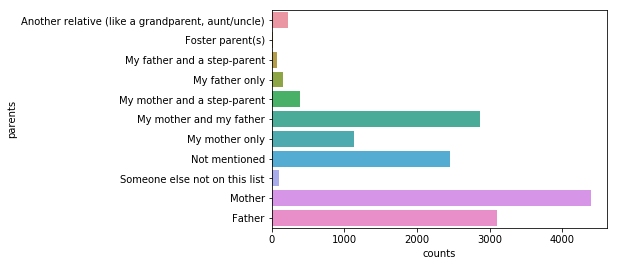

In [15]:
plot = sns.barplot(x="counts",y="parents",data=parents_data_frame)